# Random Forest Regression

Objective: Prediction using Random Forest Regression  
Dataset: energypp.csv

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('energyp.csv')
print(data.shape)
data.head()

(9568, 5)


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
data.columns = ['Temp','ExhaustVacuum','AmPressure','RelHumidity','EnergyOutput']
data.head()

,Temp,ExhaustVacuum,AmPressure,RelHumidity,EnergyOutput
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## Check Null

In [4]:
data.isnull().sum()

Temp             0
ExhaustVacuum    0
AmPressure       0
RelHumidity      0
EnergyOutput     0
dtype: int64

## Correlation

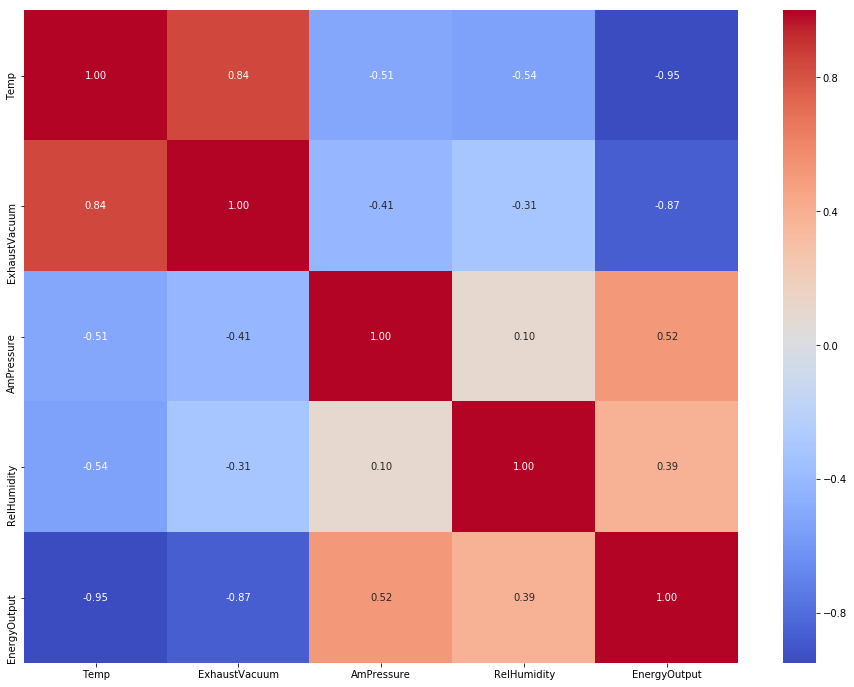

In [5]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [6]:
corr_rank = data.corr()
corr_rank["EnergyOutput"].sort_values(ascending=False)

EnergyOutput     1.000000
AmPressure       0.518429
RelHumidity      0.389794
ExhaustVacuum   -0.869780
Temp            -0.948128
Name: EnergyOutput, dtype: float64

## Data Processing and Selection

In [7]:
X = data.iloc[:, 0:4].values
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (9568, 4)


array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08]])

In [8]:
y = data.iloc[:, -1].values
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (9568,)


array([463.26, 444.37, 488.56, 446.48, 473.9 ])

## Data Normalization

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (9568, 4)


array([[-0.62951938, -0.98729659,  1.8204884 , -0.00951935],
       [ 0.74190911,  0.68104512,  1.1418628 , -0.97462052]])

## Split Train Test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("X TRAIN Set: ", X_train.shape, y_train.shape)
print("X TEST Set : ", X_test.shape, y_test.shape)

X TRAIN Set:  (7654, 4) (7654,)
X TEST Set :  (1914, 4) (1914,)


## Random Forest Regression

In [11]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test) 

from sklearn import metrics
print("R-Square               :", round(metrics.r2_score(y_test, y_pred),4))
print('Mean Absolute Error    :', round(metrics.mean_absolute_error(y_test, y_pred),4))  
print('Mean Squared Error     :', round(metrics.mean_squared_error(y_test, y_pred),4))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4)) 
print("Accuracy score         :", round(regressor.score(X_test, y_test),4))

R-Square               : 0.9673
Mean Absolute Error    : 2.2824
Mean Squared Error     : 9.7913
Root Mean Squared Error: 3.1291
Accuracy score         : 0.9673


## Data Prediction

In [17]:
df_pred1 = data[data.index == 200]
df_pred2 = data[data.index == 9000]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,Temp,ExhaustVacuum,AmPressure,RelHumidity,EnergyOutput
200,22.35,54.42,1012.46,75.01,454.72
9000,29.05,75.60,1017.63,51.16,439.14


In [18]:
Xp = df_pred.iloc[:, 0:4].values
Xp = scaler.transform(Xp)

yp = df_pred.iloc[:, -1].values

## Prediction using RF Regressor

In [20]:
RFR_pred = regressor.predict(Xp)
RFR_pred

array([452.726  , 439.01445])